In [31]:
# %pip install cvzone medaia

In [32]:
import cv2
from cvzone.HandTrackingModule import HandDetector
import numpy as np
import math
import time

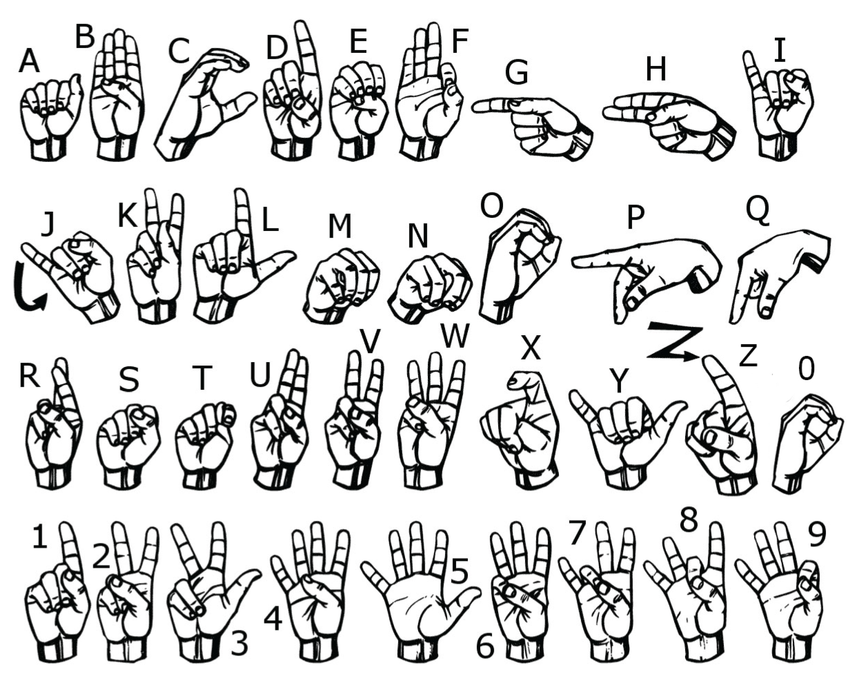

In [33]:
from PIL import Image
import IPython.display as display

# Load the image
image = Image.open("C:/Users/aditya/Desktop/project/Gesture_Control/sign.png")

# Show the image in the output cell (Jupyter/Colab)
display.display(image)


In [ ]:
cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
offset = 20
imgSize = 300
folder = "C:/Users/aditya/Desktop/project/Gesture_Control/Dataset/Y/"
counter = 0

: 

In [35]:
while True:
    success, img = cap.read()
    if not success:
        print("Failed to read from webcam.")
        break

    hands, img = detector.findHands(img)  # returns both hands and annotated image

    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgHeight, imgWidth, _ = img.shape

        # Clamp coordinates to image bounds
        x1 = max(0, x - offset)
        y1 = max(0, y - offset)
        x2 = min(imgWidth, x + w + offset)
        y2 = min(imgHeight, y + h + offset)

        imgCrop = img[y1:y2, x1:x2]

        if imgCrop.size == 0:
            print("Warning: imgCrop is empty, skipping this frame.")
            continue

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCropShape = imgCrop.shape
        aspectRatio = h / w

        if aspectRatio > 1:
            k = imgSize / imgCrop.shape[0]
            wCal = math.ceil(k * imgCrop.shape[1])
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
        else:
            k = imgSize / imgCrop.shape[1]
            hCal = math.ceil(k * imgCrop.shape[0])
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize

        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)

    cv2.imshow("Image", img)
    key = cv2.waitKey(1)

    if key == ord("s"):
        counter += 1
        cv2.imwrite(f'{folder}/Image_{time.time()}.jpg', imgWhite)
        print(f"Image saved. Total count: {counter}")

    if key == ord("q"):
        print("Quitting...")
        break


Image saved. Total count: 1
Image saved. Total count: 2
Image saved. Total count: 3
Image saved. Total count: 4
Image saved. Total count: 5
Image saved. Total count: 6
Image saved. Total count: 7
Image saved. Total count: 8
Image saved. Total count: 9
Image saved. Total count: 10
Image saved. Total count: 11
Image saved. Total count: 12
Image saved. Total count: 13
Image saved. Total count: 14
Image saved. Total count: 15
Image saved. Total count: 16
Image saved. Total count: 17
Image saved. Total count: 18
Image saved. Total count: 19
Image saved. Total count: 20
Image saved. Total count: 21
Image saved. Total count: 22
Image saved. Total count: 23
Image saved. Total count: 24
Image saved. Total count: 25
Image saved. Total count: 26
Image saved. Total count: 27
Image saved. Total count: 28
Image saved. Total count: 29
Image saved. Total count: 30
Image saved. Total count: 31
Image saved. Total count: 32
Image saved. Total count: 33
Image saved. Total count: 34
Image saved. Total coun